# Test Finale Python - DAPT0524


### Luciana SOLAZZO

Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo 
https://github.com/owid/covid-19-data/tree/master/public/data alla voce " Download ourcomplete COVID-19 dataset"
scaricare il dataset nel formato che si preferisce.

In [3]:
# Importo il dataset utilizzando direttamente l'URL del sito internet 
import numpy as np 
import pandas as pd
# importo anche le librerie che mi serviranno per i grafici
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

path = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

covid19 = pd.read_csv(path) # rinomino il dataframe in covid19

covid19 # visualizzo un primo esempio del dataframe con le prime 5 e le ultime 5 righe del dataset. Posso notare che sono ordinati in ordine alfabetico in base all'iso_code e al continente

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


1. Si richiede di verificare le dimensioni del dataset e i relativi metadati

In [5]:
covid19.shape # posso vedere il numero di righe e colonne totali del df 

(429435, 67)

In [6]:
# per avere un'idea più completa del dataset posso visualizzare lanciare anche altre richiesta:

covid19.head(10) # visualizzo le prime (n) righe del dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-01-11,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-01-12,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-01-13,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-01-14,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [7]:
covid19.tail(10) # visualizzo le ultime (n) righe del dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
429425,ZWE,Africa,Zimbabwe,2024-07-26,266386.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429426,ZWE,Africa,Zimbabwe,2024-07-27,266386.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429427,ZWE,Africa,Zimbabwe,2024-07-28,266386.0,0.0,0.000,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429428,ZWE,Africa,Zimbabwe,2024-07-29,266386.0,0.0,0.000,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429429,ZWE,Africa,Zimbabwe,2024-07-30,266386.0,0.0,0.000,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.000,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.000,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.000,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.000,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429434,ZWE,Africa,Zimbabwe,2024-08-04,266386.0,0.0,0.000,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [8]:
covid19.sample(10) # visualizzo (n) righe random all'interno del dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
83862,CIV,Africa,Cote d'Ivoire,2020-06-01,2799.0,0.0,61.857,34.0,0.0,0.429,...,NaN,19.351,NaN,57.78,0.538,28160548,NaN,NaN,NaN,NaN
154626,GTM,North America,Guatemala,2022-04-07,829881.0,0.0,962.286,17318.0,0.0,6.286,...,NaN,76.665,0.6,74.30,0.663,17843914,NaN,NaN,NaN,NaN
135120,PYF,Oceania,French Polynesia,2023-11-10,78659.0,0.0,0.857,649.0,0.0,0.000,...,NaN,NaN,NaN,77.66,NaN,306292,NaN,NaN,NaN,NaN
180000,IRQ,Asia,Iraq,2023-11-26,2465545.0,0.0,0.000,25375.0,0.0,0.000,...,NaN,94.576,1.4,70.60,0.674,44496124,NaN,NaN,NaN,NaN
119212,OWID_EUR,NaN,Europe,2021-10-09,59418002.0,0.0,129906.286,1266314.0,0.0,1907.000,...,NaN,NaN,NaN,NaN,NaN,744807803,NaN,NaN,NaN,NaN
123931,FLK,South America,Falkland Islands,2020-09-21,13.0,0.0,0.000,0.0,0.0,0.000,...,NaN,NaN,NaN,81.44,NaN,3801,NaN,NaN,NaN,NaN
304890,PCN,Oceania,Pitcairn,2021-06-13,0.0,0.0,0.000,0.0,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,47,NaN,NaN,NaN,NaN
312928,REU,Africa,Reunion,2020-07-16,577.0,0.0,5.857,3.0,0.0,0.143,...,NaN,NaN,NaN,80.48,NaN,974062,NaN,NaN,NaN,NaN
187355,JAM,North America,Jamaica,2021-02-11,16841.0,0.0,187.714,357.0,0.0,1.286,...,28.6,66.425,1.7,74.47,0.734,2827382,NaN,NaN,NaN,NaN
324098,KNA,North America,Saint Kitts and Nevis,2023-08-16,6607.0,0.0,0.000,46.0,0.0,0.000,...,NaN,NaN,2.3,76.23,0.779,47681,NaN,NaN,NaN,NaN


In [9]:
covid19.info() # metadati. Posso notare che il dataset contiene 4 colonne con dtype "object" (3, se escludiamo la colonna "date" che si riferisce a date in formato datetime)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [10]:
na_count = covid19["continent"].isna().sum()
print(f"La colonna 'continent' contiene {na_count} valori nulli.")

La colonna 'continent' contiene 26525 valori nulli.


In [11]:
# esplorazione delle colonne categoriche e dei dati nulli
for column in covid19.columns: # avvio un ciclo for per studiare meglio i dati categorici
    if covid19[column].dtype == "object": 
        print(f"La colonna {column} contiene dati categorici.")
        count_unici = covid19[column].nunique() # conteggio dei valori unici
        print(f"La colonna {column} contiene {count_unici} valori unici")
        tot_count = covid19[column].value_counts()
        print(f"La distribuzione di ogni valore univoco è la seguente:") # frequenza dei valori unici
        print(tot_count)
        count_nulli = covid19[column].isna().sum() # conteggio dei valori nulli
        percent_nulli = (count_nulli / covid19.shape[0] * 100).round(2) # percentuali dei valori nulli
        print(f"La colonna {column} contiene {count_nulli} valori nulli, {percent_nulli}% in tutte le righe")
        print()

La colonna iso_code contiene dati categorici.
La colonna iso_code contiene 255 valori unici
La distribuzione di ogni valore univoco è la seguente:
iso_code
OWID_HIC    3026
OWID_EUN    3024
OWID_UMC    3013
OWID_LMC    2983
OWID_LIC    2724
            ... 
OWID_SCT    1305
OWID_WLS    1198
MAC          795
OWID_CYN     691
ESH            1
Name: count, Length: 255, dtype: int64
La colonna iso_code contiene 0 valori nulli, 0.0% in tutte le righe

La colonna continent contiene dati categorici.
La colonna continent contiene 6 valori unici
La distribuzione di ogni valore univoco è la seguente:
continent
Africa           95419
Europe           91031
Asia             84199
North America    68638
Oceania          40183
South America    23440
Name: count, dtype: int64
La colonna continent contiene 26525 valori nulli, 6.18% in tutte le righe

La colonna location contiene dati categorici.
La colonna location contiene 255 valori unici
La distribuzione di ogni valore univoco è la seguente:
locati

In [12]:
# esplorazione delle colonne che contengono valori quantitativi
covid19.describe() 

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,411804.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060873,112096.199396,122.357074,122.713844,835.514313,...,33.097723,50.649264,3.106912,73.702098,0.722139,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666400
std,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636567,162240.412419,1508.778583,559.701638,1134.932671,...,13.853948,31.905375,2.549205,7.387914,0.148903,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892769
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100500,0.000000,0.000000,24.568000,...,22.600000,20.859000,1.300000,69.500000,0.602000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.872242
50%,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.475000,0.000000,2.794000,295.089000,...,33.100000,49.542000,2.500000,75.050000,0.740000,6.336393e+06,6.815199e+03,8.130000,5.660000,1270.801400
75%,7.582720e+05,0.000000e+00,3.132860e+02,9.574000e+03,0.000000,3.143000,156770.190000,0.000000,56.253000,1283.817000,...,41.500000,82.502000,4.210000,79.460000,0.829000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.024150
max,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.515000


2. Si chiede di trovare, per ogni continente:
   a. il numero di casi fin dall'inizio della pandemia
   b. la percentuale rispetto al totale mondiale del numero di casi

N.B. rispetto alla richiesta non posso fare un raggruppamento direttamente della colonna continente. Perchè i valori delle colonne che contegono dati quantitativi sono differenziati per nazione o macroaree (colonna "location"). Quindi ho prima raggruppato per nazione e poi per continente in un secondo momento. Inoltre per essere sicura che i valori non si discostassero in maniera significativa, ho effettuato il conteggio sia facendo una somma cumulativa dalla colonna new_cases, sia selezionando il valore massimo per nazione dalla colonna total_cases. Infine, ho deciso di ignorare le righe che presentavano il valore nullo nella colonna "continent" poiché potrebbero generare duplicati indesiderati nelle associazioni tra "location" e "continent".

In [14]:
# 2.a - Metodo 1 (utilizzo la colonna "new_cases")

covid19 = covid19.dropna(subset=["continent"])  # Rimuovo le righe con valori nulli nella colonna "continent"

# Creo una nuova colonna con la somma cumulativa dei "new_cases"
covid19.loc[:, "cum_cases_location"] = covid19.groupby("location")["new_cases"].cumsum()

# Calcolo il valore massimo cumulativo per ciascun paese
tot_max = covid19.groupby("location")["cum_cases_location"].max()

# Controllo duplicati e unisco informazioni sui continenti
loc_to_cont = covid19[["location", "continent"]].drop_duplicates()
merged = tot_max.reset_index()  # Resetto l'indice
merged = merged.merge(loc_to_cont, on="location", how="left")

# Somma dei valori cumulativi per continente
tot_cont = merged.groupby("continent")["cum_cases_location"].sum()
overall_tot = tot_cont.sum()

print(f"I casi totali dall'inizio della pandemia fino all'ultima rilevazione sono i seguenti\n{tot_cont}")
print(f"\nIl totale complessivo dei casi dall'inizio della pandemia è: {overall_tot}")

I casi totali dall'inizio della pandemia fino all'ultima rilevazione sono i seguenti
continent
Africa            13146831.0
Asia             301564180.0
Europe           252916868.0
North America    124492698.0
Oceania           15003468.0
South America     68811012.0
Name: cum_cases_location, dtype: float64

Il totale complessivo dei casi dall'inizio della pandemia è: 775935057.0


C:\Users\luciana\AppData\Local\Temp\ipykernel_30964\3290249415.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid19.loc[:, "cum_cases_location"] = covid19.groupby("location")["new_cases"].cumsum()


In [15]:
# 2.a - Metodo 2 (analisi sulla colonna "total_cases")
covid19 = covid19.dropna(subset=["continent"]) # Rimuovi le righe con valori nulli nella colonna "continent" come spiegato precedentemente

# Prendo in considerazione il valore massimo per ogni location
tot_max1 = covid19.groupby("location")["total_cases"].max()

# i passaggi successivi sono identici al metodo 1
loc_to_cont1 = covid19[["location", "continent"]].drop_duplicates()  # in questo caso non ci sono duplicati che falsano il calcolo ma è un "controllo" che ho ritenuto necessario aggiungere
merged1 = tot_max1.reset_index()  # faccio un reset dell'indice per effettuare successivamente un .merge
merged1 = merged1.merge(loc_to_cont1, on="location", how="left")  # Unisco le informazioni sui continenti

# Somma dei valori cumulativi per continente
tot_cont1 = merged1.groupby("continent")["total_cases"].sum()
overall_tot1 = tot_cont1.sum()
print(f"I casi totali dall'inizio della pandemia sono i seguenti \n{tot_cont1}")
print(f"\nIl totale complessivo dei casi dall'inizio della pandemia è: {overall_tot1}")
#  i casi totali differiscono di circa 35000 contagi tra lo studio sulla colonna "new_cases" e "total_cases", un numero poco rilevante rispetto al totale (meno dello 0,001%). 
# La gran parte di questa differenza si concentra in Asia, circostanza che ci può far pensare che solo in quel continente (o più verosimilmente in alcune nazioni di quel contintente) la comunicazione sulle rilevazioni dei contagi è stata 
# sospesa prima del 04/08/2024 (che è la data in cui è stata fatta l'ultima rilevazione nella maggior parte dei casi).

I casi totali dall'inizio della pandemia sono i seguenti 
continent
Africa            13145540.0
Asia             301532347.0
Europe           252916868.0
North America    124492666.0
Oceania           15003352.0
South America     68809418.0
Name: total_cases, dtype: float64

Il totale complessivo dei casi dall'inizio della pandemia è: 775900191.0


In [16]:
# 2.b - sulla base dell'esercizio precedente utilizzo il valore già calcolato "overall_tot" calcolata sulla somma dei calcoli effettuati precedentemente sulla colonna "new_cases"
percent_per_continent = (tot_cont / overall_tot * 100).round(3)

# Mostra le percentuali
print(f"{percent_per_continent}")
print(f"Il totale delle percentuali è: {percent_per_continent.sum().round(3)} %")

# ho inserito anche il calcolo delle percentuali totali per verificare l'esattezza dei valori. Arrotondando il calcolo di "percent_per_continent" a tre cifre decimali: la somma ci restituisce il 100%

continent
Africa            1.694
Asia             38.865
Europe           32.595
North America    16.044
Oceania           1.934
South America     8.868
Name: cum_cases_location, dtype: float64
Il totale delle percentuali è: 100.0 %


3. Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati: 
    a. l'evoluzione del casi totali dall'inizio alla fine dell'anno
    b. il numero di nuovi casi rispetto alla data
        k. poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni

<Axes: title={'center': "Andamento dei casi totali in Italia per l'anno 2022"}, xlabel='Mesi', ylabel='Numero di casi'>

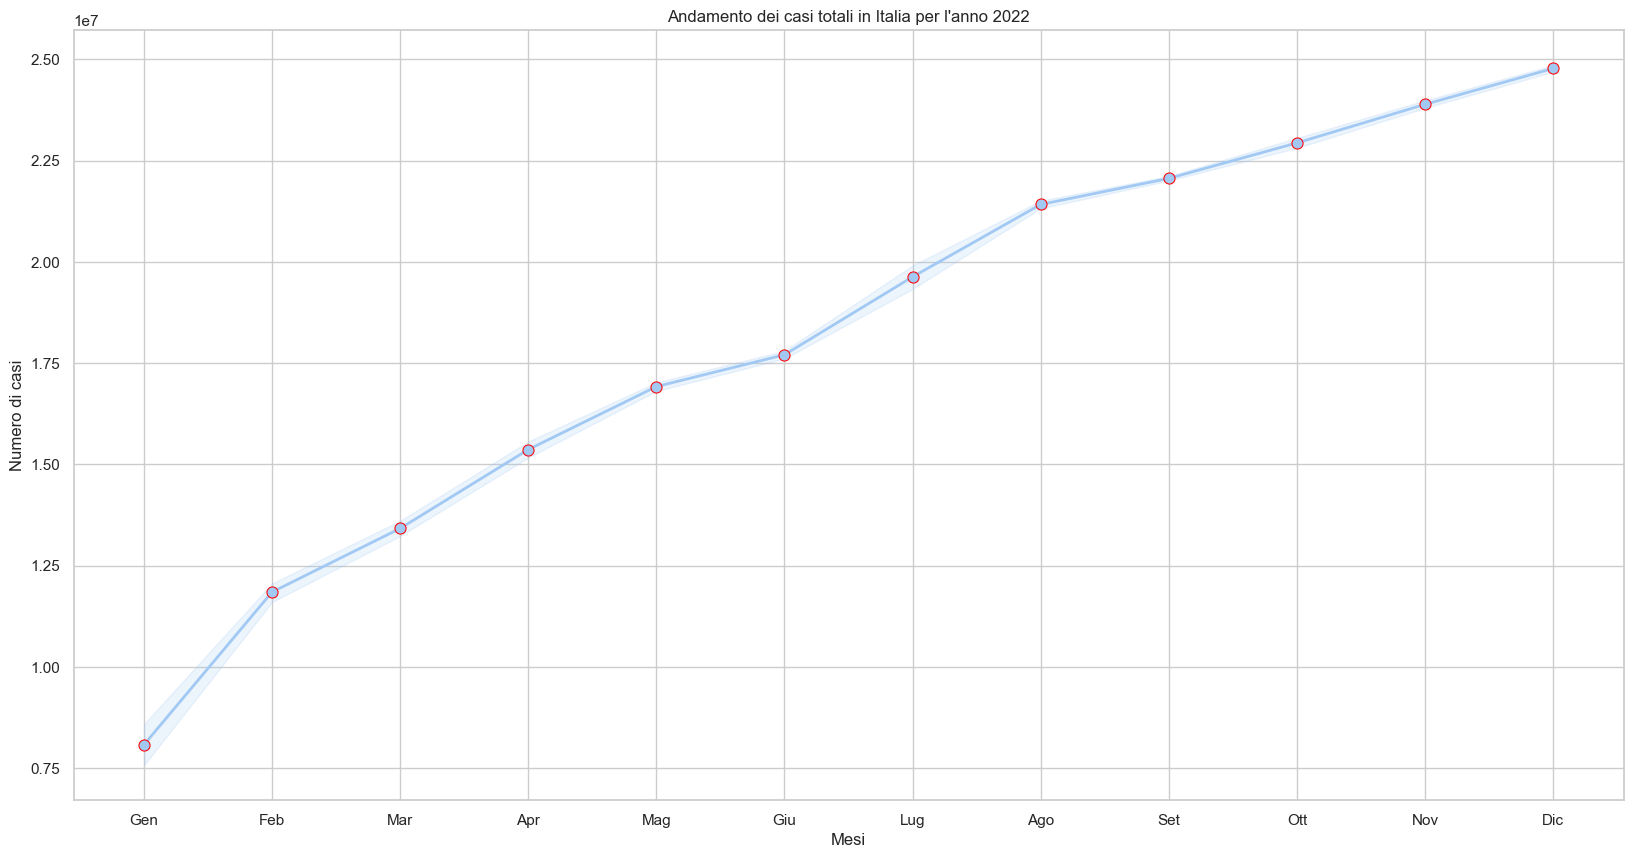

In [18]:
# 3.a
# trasformo i valori della colonna date da object in formato data 
covid19.date = pd.to_datetime(covid19.date)

start_date = "2022-01-01" # inizializzo le date per poter cambiare il periodo analizzato più facilmente in caso di necessità
end_date = "2022-12-31"

# creo un un nuovo Dataframe applicando il filtro di ricerca -> nazione e estremi delle date inizializzate precedentemente
italy22 = covid19[(covid19.location == "Italy") & (covid19.date >= start_date) & (covid19.date <= end_date)]

# ho usato https://seaborn.pydata.org/index.html e https://matplotlib.org/stable/ per personalizzare il grafico
plt.figure(figsize=(20, 10)) # scelgo la grandezza del grafico
sns.set(style="whitegrid")
sns.set_palette("pastel")
# nel codice che segue ho provato varie personalizzazioni del grafico. Ad esempio la colore della linea di andamento e la dimensione, il colore e l'aspetto del marker
italy_graf_22 = sns.lineplot(
    data=italy22,
    x = (covid19.date.dt.month),
    y = "total_cases",
    marker = "o",             
    markersize = 8,                        
    markeredgecolor = "red",   
    linewidth=2,              
)
# cambio il titolo e il nome dell'asse X e Y
italy_graf_22.set(
    title = "Andamento dei casi totali in Italia per l'anno 2022",
    xlabel = "Mesi", 
    ylabel = "Numero di casi")
# personalizzo i valori sull'asse delle X
italy_graf_22.set_xticks(range(1, 13))  # in questo modo definisco un range di 12 "slot" per le etichette dei mesi che popoleranno l'asse X
italy_graf_22.set_xticklabels(["Gen", "Feb", "Mar", "Apr", "Mag", "Giu", "Lug", "Ago", "Set", "Ott", "Nov", "Dic"])
# per quanto riguarda la colonna dell'asse Y i numeri che vediamo, come si vede dalla notazione 1e7, andrebbero moltiplicati per 1 seguito da sette zeri (quindi sono nell'ordine delle decine di milioni)

italy_graf_22

<Axes: title={'center': "Andamento settimanale dei Nuovi Casi in Italia per l'anno 2022"}, xlabel='Settimane', ylabel='Numero di nuovi casi'>

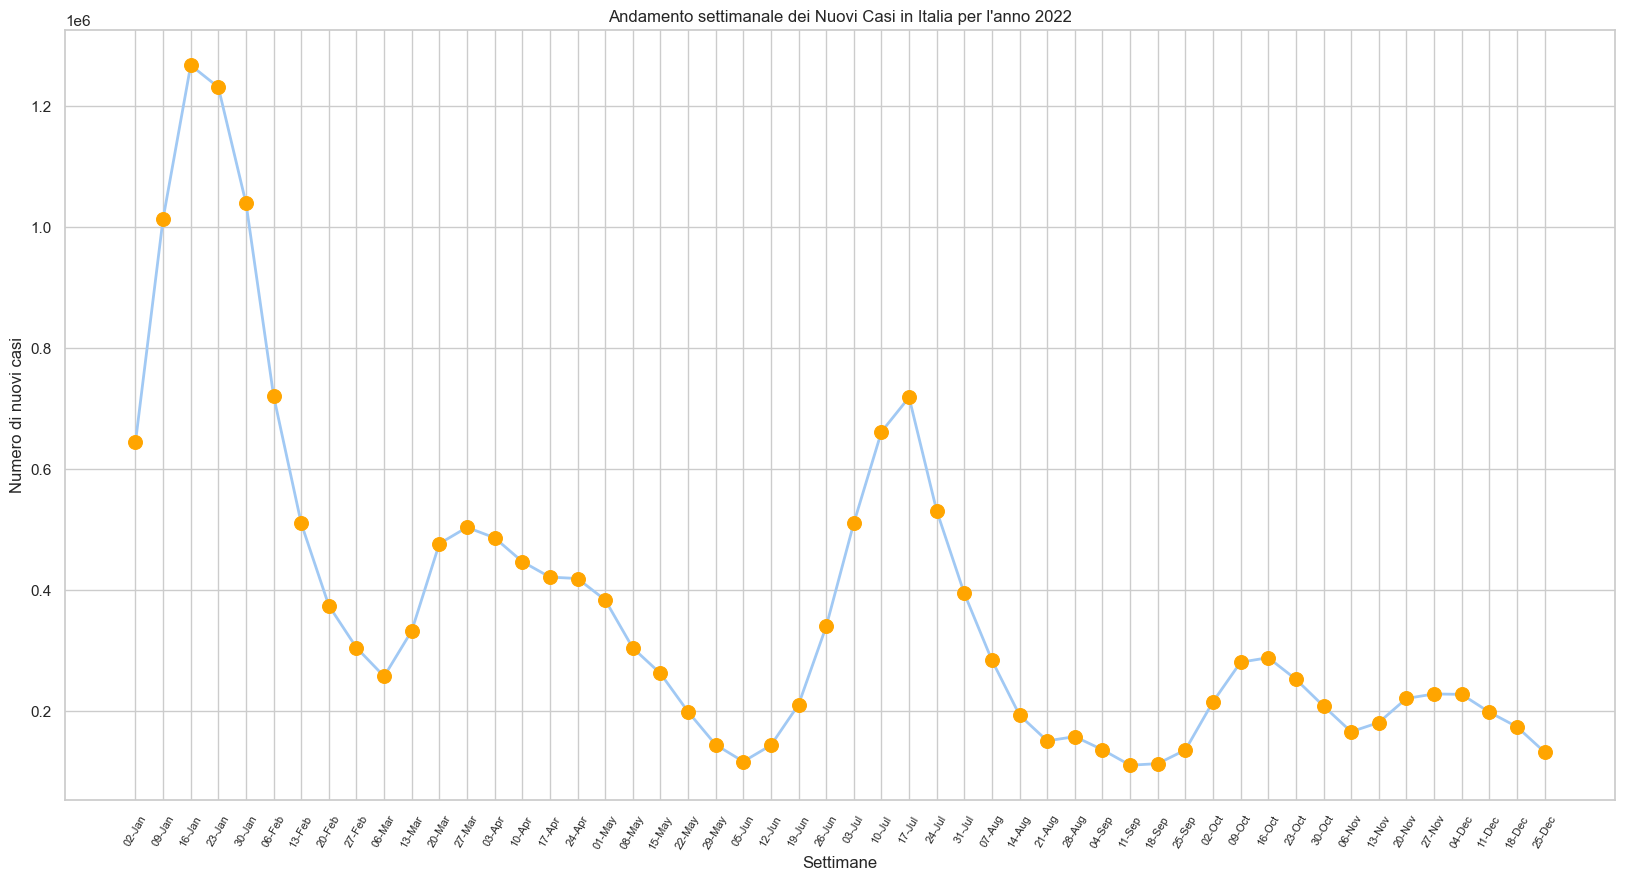

In [19]:
#3. b e k (1° Grafico - LINEPLOT)
# prendo sempre in esame la selezione fatta precendentemente (italy22). I casi italiani per l'anno 2022. Ma in questo caso analizzo la colonna new_cases. 
# in primo luogo ignoro eventuali valori nulli o pari a zero
italy22 = italy22.dropna(subset=['new_cases'])
italy22 = italy22[italy22.new_cases > 0]

# con questo codice mi creo un periodo di tempo (di una settimana) che comincia dal sabato 01/01/2022, assicurandomi che sia presa in considerazione anche l'ultima misurazione dell'anno: 25/12/2022
italy22["week"] = italy22.date.dt.to_period("W-SAT").dt.start_time 

weekly = italy22.groupby("week")["new_cases"].sum().reset_index() # sulla base di italy22 creo un nuovo df e faccio un reset dell'indice per assicurarmi che non ricada su "week"

sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(20, 10))
new_cases22 = sns.lineplot(
    data = weekly,
    x = "week",
    y = "new_cases",
    marker = "o",
    markersize = 10,
    linewidth = 2,
    markerfacecolor = "orange",
    markeredgecolor = "orange"
)
# assegno il titolo e le etichette alla barra delle X e delle Y
new_cases22.set(
    title="Andamento settimanale dei Nuovi Casi in Italia per l'anno 2022",
    xlabel="Settimane",
    ylabel="Numero di nuovi casi"
)

# personalizzo i valori sull'asse delle X
plt.xticks(
    ticks=weekly["week"],
    labels=weekly["week"].dt.strftime("%d-%b"),
    fontsize=8,
    rotation=60
)

new_cases22

<Axes: title={'center': "Andamento settimanale dei Nuovi Casi in Italia per l'anno 2022"}, xlabel='Settimane', ylabel='Numero di nuovi casi'>

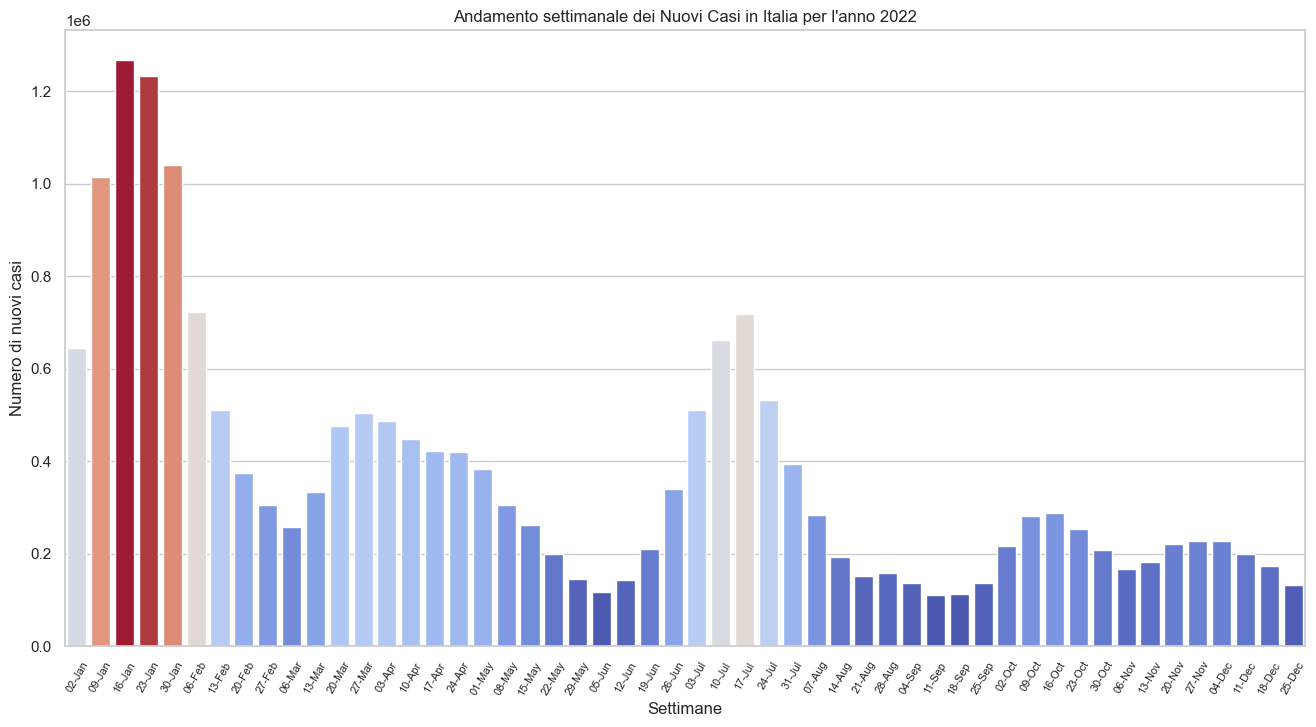

In [20]:
#3. b e k (1° Grafico - BARPLOT)
# utilizzando sempre il DataFrame precedente ho pensato di creare anche un barplot con tonalità dal blu (per i valori più bassi) al rosso (per i valori più alti)
# per poter visualizzare questa colorazione devo prima normalizzare i valori (ossia fare in modo che siano in un range compreso tra 0 e 1)
norm = mcolors.Normalize(vmin=weekly["new_cases"].min(), vmax = weekly["new_cases"].max())
# viene creata una mappatura dei valori normalizzati dalla colormap "coolwarm" 
colors = plt.cm.coolwarm(norm(weekly["new_cases"])).tolist()  # Converti in lista

# procedo alla creazione del grafico a barre 
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
bar_plot = sns.barplot(
    data = weekly, 
    x = "week", 
    y = "new_cases", 
    hue = "week",  # Assegna `x` a `hue` per gestire correttamente i colori
    palette = colors,
    dodge = False,  # Non serve spostare le barre
    legend = False  # Nasconde la legenda generata da `hue`
)

bar_plot.set(
    title="Andamento settimanale dei Nuovi Casi in Italia per l'anno 2022",
    xlabel="Settimane", 
    ylabel="Numero di nuovi casi"
)

# Personalizzo l'asse X
bar_plot.set_xticks(range(len(weekly["week"])))
bar_plot.set_xticklabels(
    weekly["week"].dt.strftime("%d-%b"),  # Formato: giorno e mese (es. 01-Jan)
    fontsize=8,
    rotation=60
)
bar_plot

4. Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso) a. scrivere un breve commento a riguardo

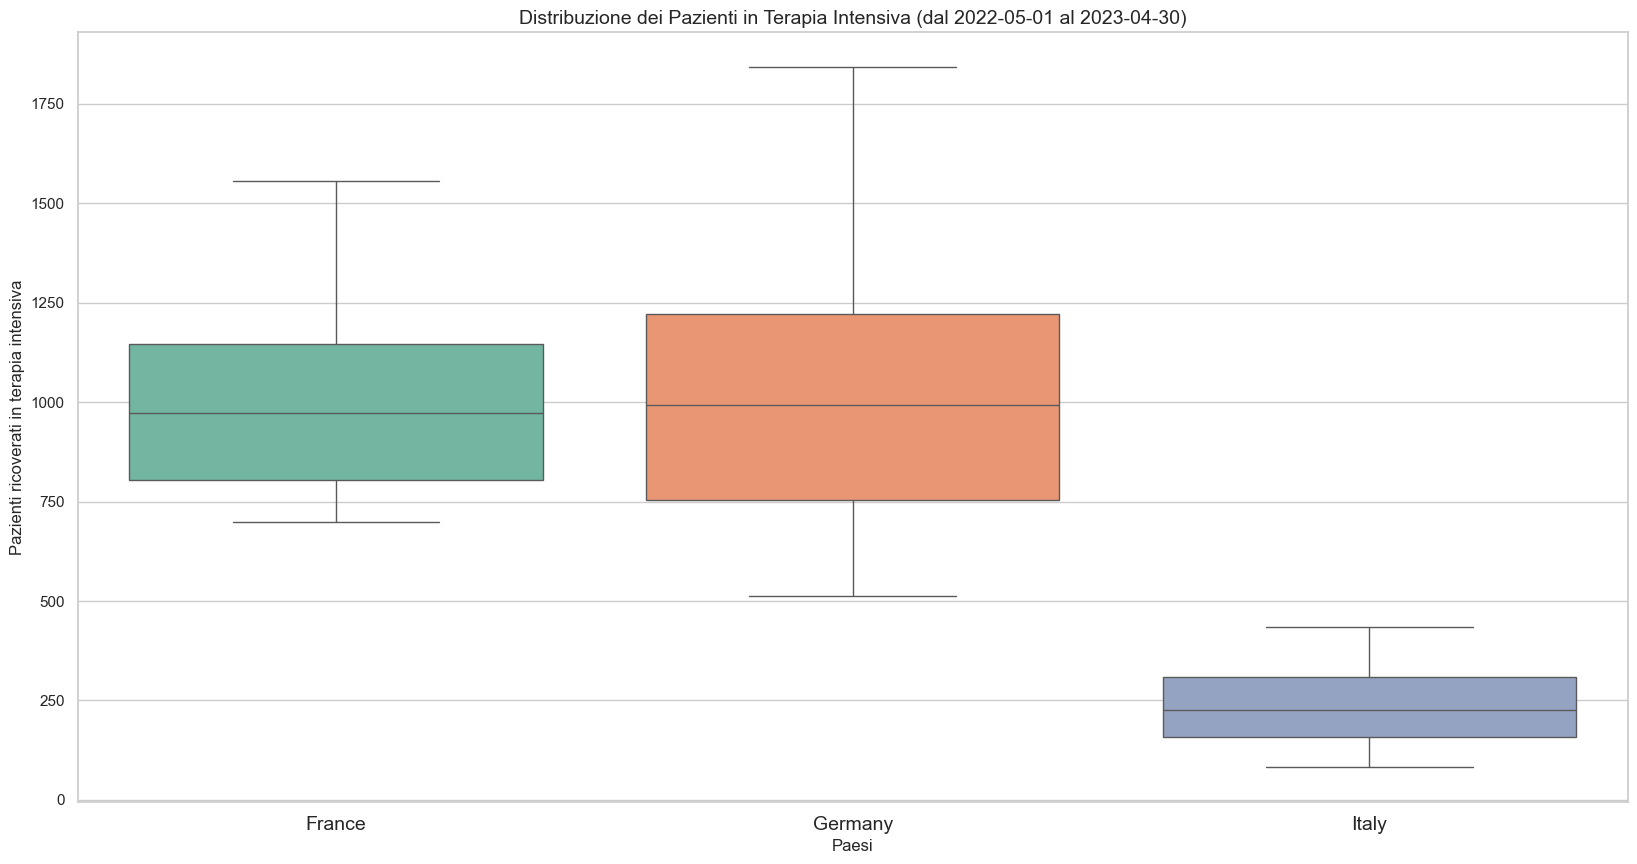

In [22]:
# 4

# inizializzo le date e le nazioni da esaminare
covid19.date = pd.to_datetime(covid19.date)
start_date = "2022-05-01"
end_date = "2023-04-30"
locations = ("Italy", "France", "Germany")
period_covid = covid19[(covid19.location.isin(locations)) & (covid19.date >= start_date) & (covid19.date <= end_date)]

period_covid = period_covid.dropna(subset=["icu_patients"]) # non considero i valori nulli

# creo il boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(
    data=period_covid, 
    x="location", 
    y="icu_patients", 
    hue="location",  
    palette="Set2",
    dodge=False,     
    legend=False
)

plt.title(f"Distribuzione dei Pazienti in Terapia Intensiva (dal {start_date} al {end_date})", fontsize=14)
plt.xlabel("Paesi", fontsize=12)
plt.ylabel("Pazienti ricoverati in terapia intensiva", fontsize=12)
plt.xticks(fontsize=14)
plt.show()

5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023: 
    a. mostrare la somma dei pazienti ospitalizzati per ognuna 
    b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

In [24]:
# 5.a

# inizializzo le date e le nazioni da prendere in esame
start_date = "2023-01-01"
end_date = "2023-12-31"
locations = ("Italy", "France", "Germany", "Spain")
filter_hospital23 = covid19[(covid19.location.isin(locations)) & (covid19.date >= start_date) & (covid19.date <= end_date)]
 
# somma totale dei pazienti ospitalizzati per ogni nazione
hospitalized = filter_hospital23.groupby("location")["weekly_hosp_admissions"].sum()

# calcolo del numero totale di righe per nazione
rows_per_country = filter_hospital23.groupby("location").size()

# verifica per eventuali valori nulli per la colonna weekly_hosp_admissions, divisi per nazione e calcolo della percentuale di valori nulli
null_values = filter_hospital23[filter_hospital23.weekly_hosp_admissions.isna()].groupby('location').size()

percent_null = (null_values / rows_per_country * 100).round(2)

print("Somma dei Pazienti Ospedalizzati per Nazione nel 2023:\n", hospitalized)
print("\nDati Mancanti nel 2023 (per Nazione):\n", null_values)
print("\nPercentuale di Valori Nulli per Nazione:\n", percent_null)


Somma dei Pazienti Ospedalizzati per Nazione nel 2023:
 location
France     268117.0
Germany    897776.0
Italy      592019.0
Spain      299463.0
Name: weekly_hosp_admissions, dtype: float64

Dati Mancanti nel 2023 (per Nazione):
 location
France     275
Germany    187
Spain      203
dtype: int64

Percentuale di Valori Nulli per Nazione:
 location
France     75.34
Germany    51.23
Italy        NaN
Spain      55.62
dtype: float64


5.b - COMMENTO: In primo luogo, la decisione di utilizzare la colonna weekly_hosp_admissions invece di hosp_patients deriva dal fatto che la seconda crea un problema di ridondanza di numeri in quanto prende in considerazione nel conteggio un eventuale "paziente X" dal giorno del ricovero al giorno della dimissione, falsando non poco il risultato del numerico dei ricoveri su base annuale. 
Per quanto riguarda l'analisi dei dati relativi al 2023 emerge che il numero totale di pazienti ospedalizzati varia notevolmente tra le nazioni. La Germania registra il numero più alto (897.776 pazienti), seguita dall’Italia (592.019), dalla Spagna (299.463) e infine dalla Francia (268.117). Tuttavia, il numero di rilevazioni effettuate per ciascun paese evidenzia problematiche di completezza dei dati.
I dati mancanti mostrano criticità significative: la Francia ha il 75.34% di valori nulli (275 rilevazioni mancanti), indicando una raccolta dati estremamente incompleta. La Spagna e la Germania mostrano rispettivamente il 55.62% e il 51.23% di dati mancanti, meno grave ma comunque rilevante. L’Italia non ha valori nulli. Di conseguenza il confronto tra queste 4 nazioni è estremamente incompleto. 
Ho valutato l'idea di gestire diversamente i valori nulli, ho scartato i metodi .interpolate(), .ffill() e .bfill() perchè andrebbero a modificare notevolmente i risultati finali. Ho pensato di utilizzare il metodo .fillna(), assegnando al valore nullo lo 0, 

In [26]:
# sostituisco i valori nulli con lo 0 
filter_hospital23["weekly_hosp_admissions"] = filter_hospital23["weekly_hosp_admissions"].fillna(0)

# Calcolo della somma totale dei pazienti ospedalizzati per ciascuna nazione dopo il riempimento
filled = filter_hospital23.groupby("location")["weekly_hosp_admissions"].sum()

# i risultati aggiornati (posso notare che non sono variati rispetto a quelli comunicati dalle varie nazioni)
print("Somma dei Pazienti Ospedalizzati per Nazione nel 2023 (dopo il fillna):\n", filled)

Somma dei Pazienti Ospedalizzati per Nazione nel 2023 (dopo il fillna):
 location
France     268117.0
Germany    897776.0
Italy      592019.0
Spain      299463.0
Name: weekly_hosp_admissions, dtype: float64


C:\Users\luciana\AppData\Local\Temp\ipykernel_30964\984178909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_hospital23["weekly_hosp_admissions"] = filter_hospital23["weekly_hosp_admissions"].fillna(0)
